# Diseño de zapata aislada

In [1]:
#Importar las librerías necesarias
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from utils import concreto_utils as conc

In [2]:
# Definicion de las unidades
N = 1
m = 1
cm = m/100
Pa = 1
MPa = 10**6*Pa
pulg = 2.54 *m / 100
kN = 1000*N
kgf = 9.80665*N
tonf = 1000*kgf
ft = 12*pulg
ksi = 6894757.2932*Pa
kip = ksi*pulg**2
psi = 6894.76*Pa

In [3]:
# Definicion de varillas de acero:
d_3 = 3/8 * pulg
d_4 = 1/4 * pulg
d_5 = 5/8 * pulg
d_6 = 3/4 * pulg
d_8 = 1 * pulg

A_3 = d_3 ** 2 /4 * math.pi
A_4 = d_4 ** 2 /4 * math.pi
A_5 = d_5 ** 2 /4 * math.pi
A_6 = d_6 ** 2 /4 * math.pi
A_8 = d_8 ** 2 /4 * math.pi

#Diccionario con los diametros y areas de las varillas:
bar_dic={'3/8"':[d_3,A_3],'1/2"':[d_4,A_4],'5/8"':[d_5,A_5],
         '3/4"':[d_6,A_6],'1"':[d_8,A_8]}

# Insertando datos a la instancia

Cada sublista de la lista de fuerzas (Fzas) representan las fuerzas correspondientes a cada patron de carga: Fzas=[[D],[L],[Sx],[Sy],[Vx],[Vy]]
Adicionalmente durante el proceso de dimensionamiento a esta matriz de fuerzas se la anexiona una lista proveniente del peso propio de la zapata más el peso del terreno por encima de la zapata, quedando: Fzas=[[D],[L],[Sx],[Sy],[Vx],[Vy],[Pp]]

In [4]:
#La lista que contiene todas las fuerzas:

#El orden de la fuerzas es el siguiente: [Fz,Mx,My]
Fzas=[[180*tonf,16*tonf,11*tonf],
      [80*tonf,14*tonf,9*tonf],
      [12*tonf,0,10*tonf],
      [12*tonf,9*tonf,0],
      [0,0,0],
      [0,0,0]]

In [5]:
#Datos de la columna:
b_col=0.3
h_col=0.7

#Datos del suelo
q_adm=3.0*kgf/cm**2 #presion admisible del suelo.

#Datos de la zapata
h=0.6*m             #altura predefinida de la zapata.
Df=1.8*m            #profundidad de desplante de la zapata. (desde el NTN al NFC).

In [6]:
#Insertando los datos a la clase zapata 1:
conc.Cimentacion(q_adm,Df)
Z1=conc.Zapata(q_adm,Df,b_col,h_col,h,Fzas)

# Predimensionamiento de la zapata

In [7]:
print("Ancho de la zapata: B=",Z1.B,"m")
print("Longitud de la zapata: L=",Z1.L,"m")
print("Longitud de volados: Lv1=",Z1.Lv1,"m Lv2=",Z1.Lv2,"m")
print("Area total de la zapata: ",Z1.B*Z1.L,"m2")
print("Cargas: ")
cargas=pd.DataFrame(Fzas)
cargas.columns=['Fz','Mx','My']
cargas.index=['D','L','Sx','Sy','Vx','Vy','Pp']
print("El peso propio de la zapata se autocalculará dependiendo de las iteraciones.")
cargas/tonf

Ancho de la zapata: B= 1.2 m
Longitud de la zapata: L= 1.6 m
Longitud de volados: Lv1= 0.9 m Lv2= 0.9 m
Area total de la zapata:  1.92 m2
Cargas: 
El peso propio de la zapata se autocalculará dependiendo de las iteraciones.


,Fz,Mx,My
D,180.0000,16.0,11.0
L,80.0000,14.0,9.0
Sx,12.0000,0.0,10.0
Sy,12.0000,9.0,0.0
Vx,0.0000,0.0,0.0
Vy,0.0000,0.0,0.0
Pp,3.5856,0.0,0.0


In [8]:
#Se dimensionará la zapata para obtener los valores de B y L:
Z1.dimensionar_zapata(Z1.B,Z1.L)
print("B=",Z1.B,"m, L=",Z1.L,"m.")

B= 3.4 m, L= 3.8 m.


# Verificación de presiones: 

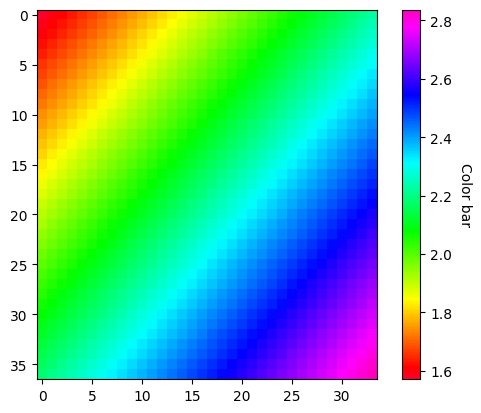

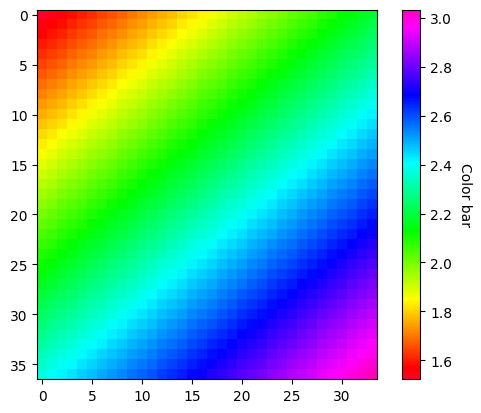

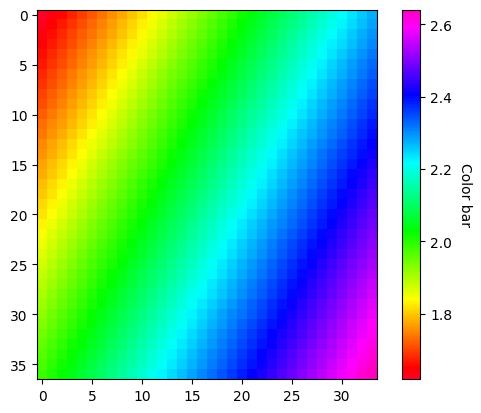

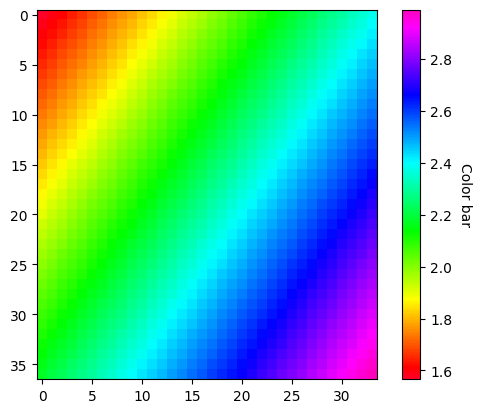

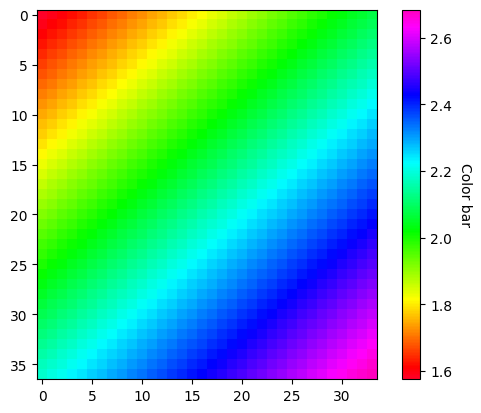

In [9]:
Z1.presiones_resultantes(Z1.B,Z1.L,n=0.1,nc=0)
Z1.presiones_resultantes(Z1.B,Z1.L,n=0.1,nc=1)
Z1.presiones_resultantes(Z1.B,Z1.L,n=0.1,nc=2)
Z1.presiones_resultantes(Z1.B,Z1.L,n=0.1,nc=3)
Z1.presiones_resultantes(Z1.B,Z1.L,n=0.1,nc=4)

In [10]:
print("La presion máxima por cargas de gravedad es: ",round(Z1.σ_max_g/(kgf/cm**2),2),"kgf/cm2")
print("La presion máxima por cargas de gravedad más sismo es: ",round(Z1.σ_max_sismo/(kgf/cm**2),2),"kgf/cm2")


La presion máxima por cargas de gravedad es:  2.84 kgf/cm2
La presion máxima por cargas de gravedad más sismo es:  3.03 kgf/cm2


# Diseño por cortante

In [11]:
Z1.diseño_cortante(fc=280*kgf/cm**2)
print("El esfuerzo ultimo es: ",round(Z1.σ_U/(kgf/cm**2),2),"kgf/cm2")
print("El nuevo peralte será: ",round(Z1.h,2),"m")
print("Cortante última: ",round(Z1.V_u/tonf,2),"tonf")
print("Cortante resistente del concreto Ø=0.85: ",round(Z1.ØV_c/tonf,2),"tonf")

El esfuerzo ultimo es:  4.24 kgf/cm2
El nuevo peralte será:  0.7 m
Cortante última:  40.32 tonf
Cortante resistente del concreto Ø=0.85:  45.23 tonf


# Diseño por punzonamiento

In [12]:
Z1.diseño_punzonamiento(fc=280*kgf/cm**2)
print("La cortante por punzonamiento es: ",round(Z1.Vu_p/tonf,2),"tonf")
print("La cortante resistente en dos direcciones Ø=0.85: ",round(Z1.ØVc_p/tonf,2),"tonf")
print("El nuevo peralte será: ",round(Z1.h,2),"m")

La cortante por punzonamiento es:  521.56 tonf
La cortante resistente en dos direcciones Ø=0.85:  543.96 tonf
El nuevo peralte será:  1.2 m


# Diseño por flexión

In [13]:
Z1.diseño_flexion(fy=4200*kgf/cm**2,fc=280*kgf/cm**2)
print("El momento ultimo es: ",round(Z1.Mu/tonf,2),"tonf-m")
print("Las posibles distribuciones de acero son: ")
for i in range(len(Z1.set_diseño)):
    print("Ø",Z1.set_diseño[i][0]," @",Z1.set_diseño[i][1],"tonf ØMn=",round(Z1.set_diseño[i][2]/tonf,2),"tonf")

El momento ultimo es:  65.79 tonf-m
Las posibles distribuciones de acero son: 
Ø 5/8"  @ 0.1 tonf ØMn= 82.17 tonf
Ø 3/4"  @ 0.15 tonf ØMn= 82.77 tonf
Ø 1"  @ 0.3 tonf ØMn= 83.93 tonf
Ø 1"  @ 0.25 tonf ØMn= 83.93 tonf
